In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
     

In [101]:
df_index=pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [103]:
#drop unnecessary collumn
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace = True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [105]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

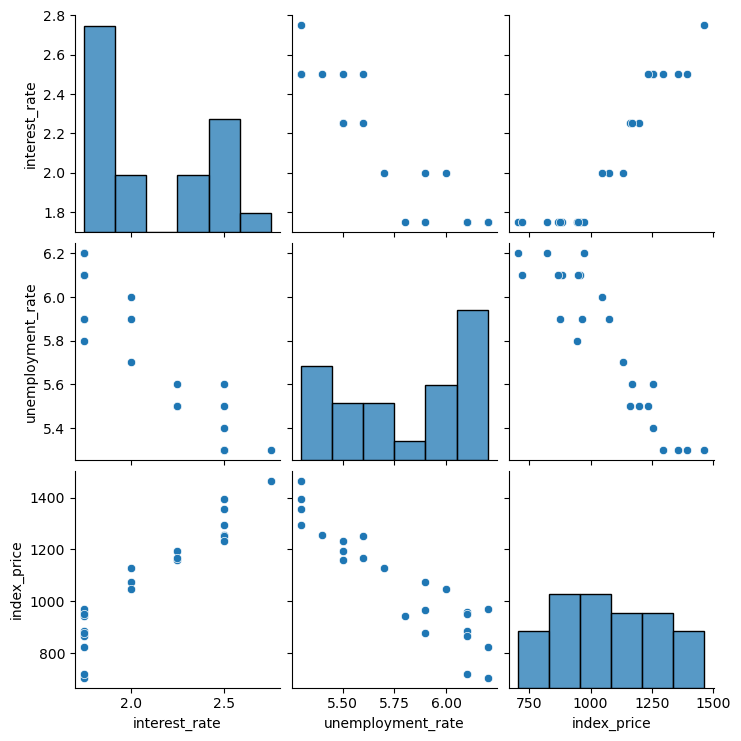

In [107]:
# lets do some visualisation
import seaborn as sns
sns.pairplot(df_index)

In [108]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment Rate')

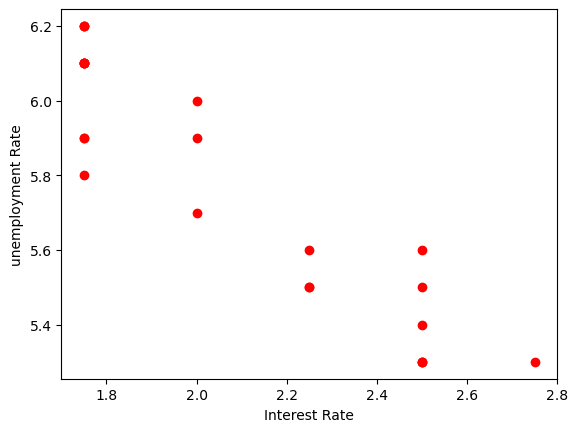

In [109]:
# visualising the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("unemployment Rate")

In [110]:
#independent and dependent feature
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [111]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [112]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [113]:
#train__test__split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [114]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [115]:
X_test


,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


In [205]:
y_test

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

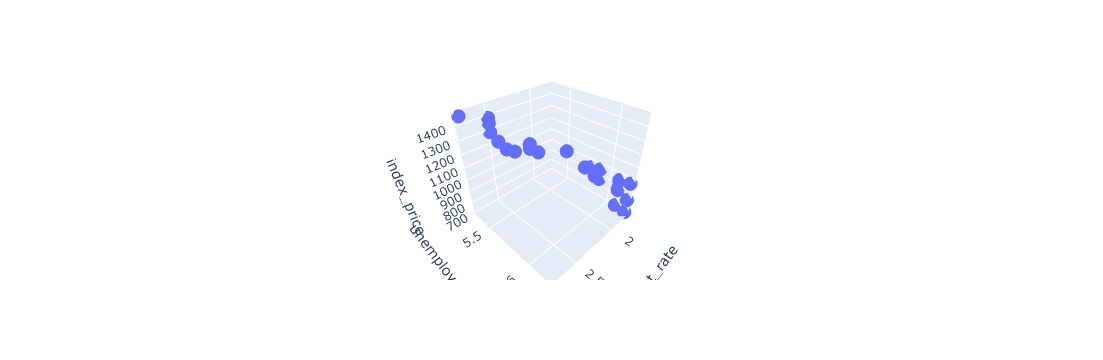

In [147]:
fig = px.scatter_3d(df_index, x='interest_rate', y='unemployment_rate', z='index_price')

fig.show()
     


In [149]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler=StandardScaler()

In [119]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [120]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [123]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [127]:
regression.fit(X_train,y_train)

LinearRegression()

In [139]:
y_pred=regression.predict(X_test)

In [141]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))
     

MAE 73.80444932337097
MSE 8108.567426306604
R2 score 0.7591371539010257


In [189]:
m=regression.coef_

In [191]:
m1=m[0]
m2=m[1]

In [193]:
b=regression.intercept_

In [195]:
m1

88.27275506911926

In [197]:
m2

-116.25716065961467

In [207]:
y_hat=b+(m1*1.75)+(m2*6.2)
y_hat

487.12736972579205